**TASK 5 - SALES PREDICTION**

**BY URNISHA SARKAR**

**Importing The Important Libraries**

In [64]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

**Importing The Advertising Dataset**

In [16]:
from google.colab import files
data=files.upload()

Saving Advertising.csv to Advertising.csv


In [17]:
df1=pd.read_csv("Advertising.csv")

In [18]:
df=df1.dropna()

**Checking The First 5 Rows**

In [19]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Checking The First 20 Rows**

In [20]:
df.head(20)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


**Checking The Last 5 rows**

In [21]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


**Checking The Last 20 Rows**

In [22]:
df.tail(20)

,Unnamed: 0,TV,Radio,Newspaper,Sales
180,181,156.6,2.6,8.3,10.5
181,182,218.5,5.4,27.4,12.2
182,183,56.2,5.7,29.7,8.7
183,184,287.6,43.0,71.8,26.2
184,185,253.8,21.3,30.0,17.6
185,186,205.0,45.1,19.6,22.6
186,187,139.5,2.1,26.6,10.3
187,188,191.1,28.7,18.2,17.3
188,189,286.0,13.9,3.7,15.9
189,190,18.7,12.1,23.4,6.7


In [23]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**Obtain The Number Of Rows and Columns**

In [24]:
df.shape

(200, 5)

In [25]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Statistical Measures Of the Dataset**

In [27]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [28]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

**Find Out Co-Relation**

In [29]:
corr=df.corr()
corr

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


**HEAT MAP**

<ipython-input-30-579b13419ea6>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


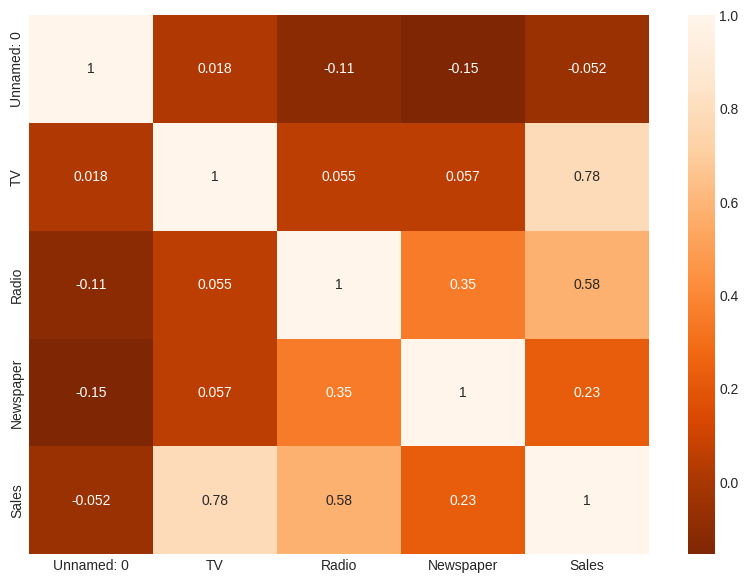

In [30]:
plt.figure(figsize=(10,7))
plt.style.use('seaborn-whitegrid')
sns.heatmap(df.corr(), annot = True, cmap = "Oranges_r")
plt.show()

**DATA VISUALISATION**

**Distribution Plot**

<ipython-input-76-10f4521d822e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


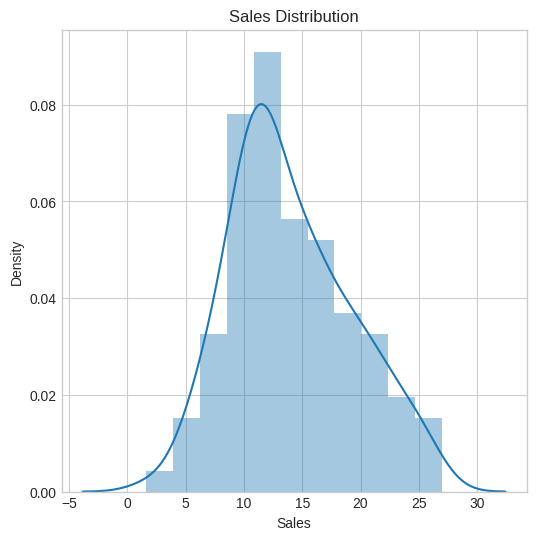

In [76]:
plt.figure(figsize=(6,6))
sns.distplot(df['Sales'])
plt.title('Sales Distribution')
plt.show()

<ipython-input-75-d3db6f38f2ab>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TV'])


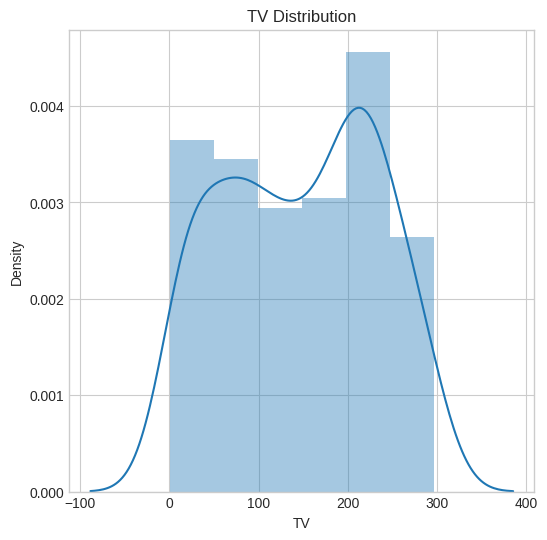

In [75]:
plt.figure(figsize=(6,6))
sns.distplot(df['TV'])
plt.title('TV Distribution')
plt.show()

<ipython-input-74-fdcecb8ee0e1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Radio'])


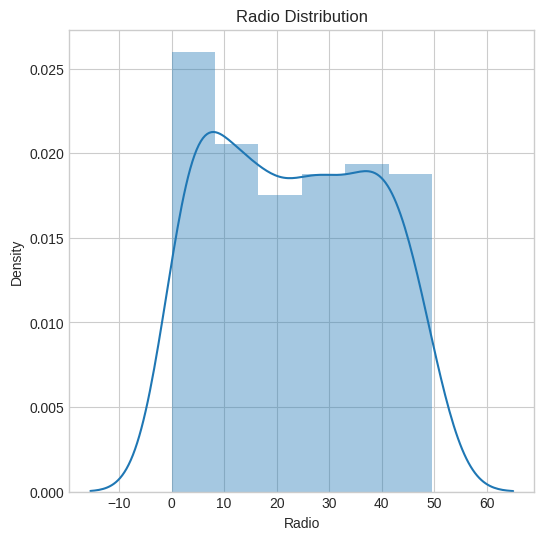

In [74]:
plt.figure(figsize=(6,6))
sns.distplot(df['Radio'])
plt.title('Radio Distribution')
plt.show()

<ipython-input-73-0db671f2867b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Newspaper'])


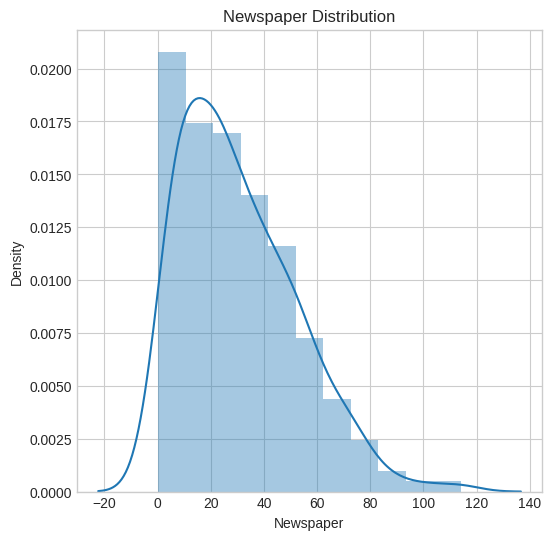

In [73]:
plt.figure(figsize=(6,6))
sns.distplot(df['Newspaper'])
plt.title('Newspaper Distribution')
plt.show()

**Pair Plot**

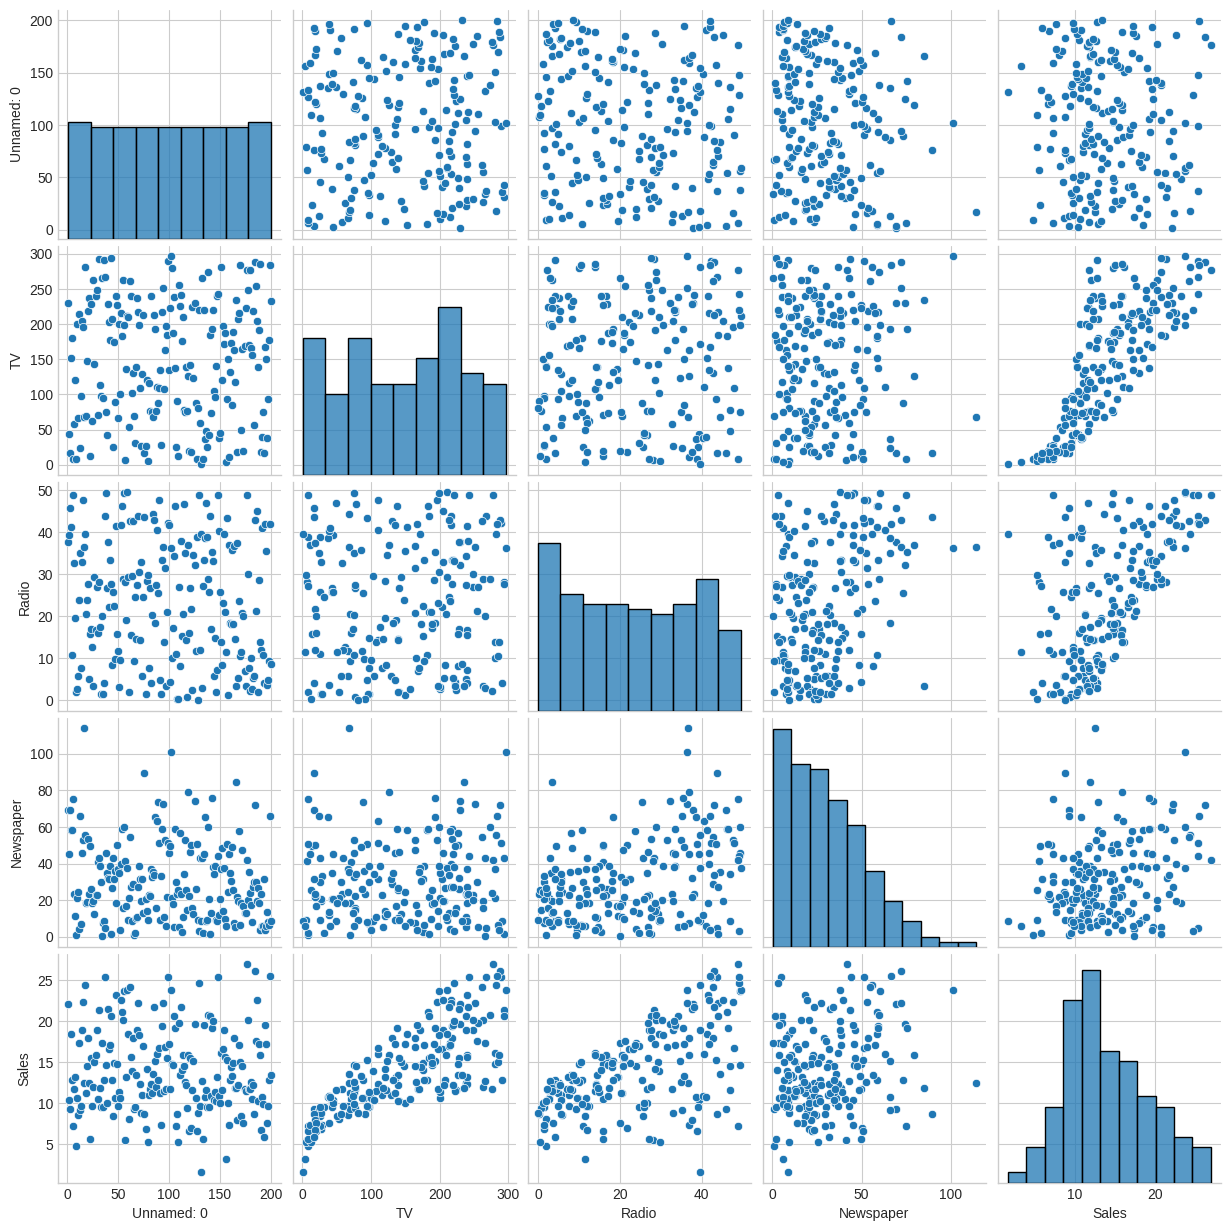

In [37]:
sns.pairplot(df)

**Box Plot**

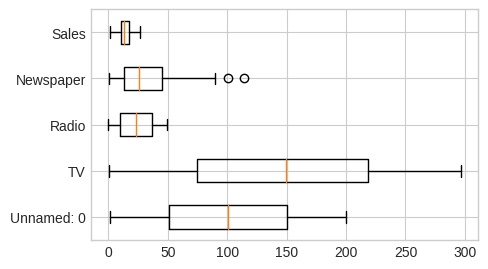

In [39]:
plt.figure(figsize=[5,3])
plt.boxplot(df,vert=False,data=df,labels=df.columns)
plt.show()

**Histplot Graph**

<Axes: xlabel='TV', ylabel='Count'>

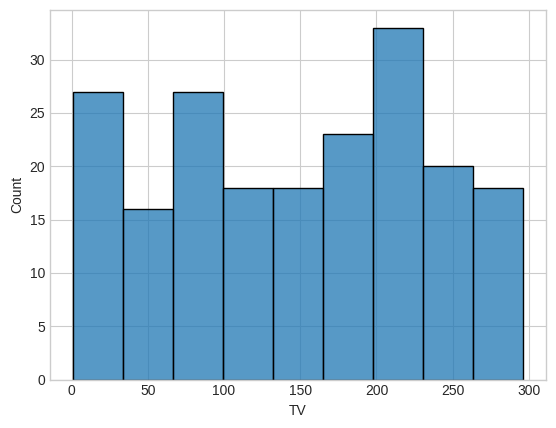

In [40]:
sns.histplot(df['TV'])

<Axes: xlabel='Newspaper', ylabel='Count'>

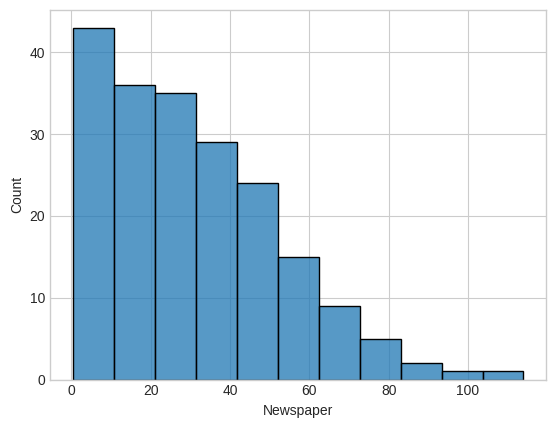

In [41]:
sns.histplot(df['Newspaper'])

<Axes: xlabel='Radio', ylabel='Count'>

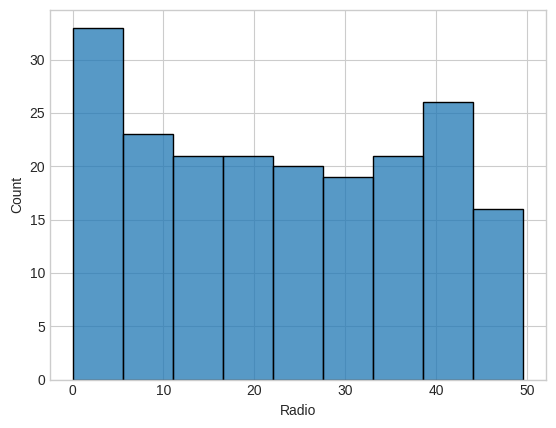

In [42]:
sns.histplot(df['Radio'])

<Axes: xlabel='Sales', ylabel='Count'>

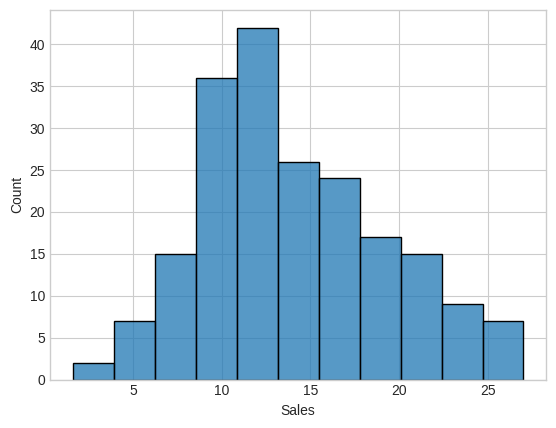

In [43]:
sns.histplot(df['Sales'])

**TRAIN-TEST SPLIT**

In [52]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [53]:
X =np.array(df.drop(['Sales'], 1))
y =np.array(df['Sales'])

<ipython-input-53-0f5fb5e6cf60>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X =np.array(df.drop(['Sales'], 1))


In [54]:
X

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [55]:
y

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

In [56]:
X_train, X_test, y_train, y_test= train_test_split(X, y,train_size=0.8,test_size=0.2,random_state=0)

In [57]:
X_train

array([[ 36.9,  38.6,  65.6],
       [ 31.5,  24.6,   2.2],
       [142.9,  29.3,  12.6],
       [209.6,  20.6,  10.7],
       [215.4,  23.6,  57.6],
       [102.7,  29.6,   8.4],
       [  8.6,   2.1,   1. ],
       [ 16.9,  43.7,  89.4],
       [125.7,  36.9,  79.2],
       [104.6,   5.7,  34.4],
       [109.8,  14.3,  31.7],
       [229.5,  32.3,  74.2],
       [253.8,  21.3,  30. ],
       [184.9,  21. ,  22. ],
       [ 44.7,  25.8,  20.6],
       [ 62.3,  12.6,  18.3],
       [292.9,  28.3,  43.2],
       [172.5,  18.1,  30.7],
       [202.5,  22.3,  31.6],
       [  7.3,  28.1,  41.4],
       [265.2,   2.9,  43. ],
       [197.6,   3.5,   5.9],
       [218.5,   5.4,  27.4],
       [147.3,  23.9,  19.1],
       [171.3,  39.7,  37.7],
       [217.7,  33.5,  59. ],
       [262.7,  28.8,  15.9],
       [163.5,  36.8,   7.4],
       [100.4,   9.6,   3.6],
       [ 76.3,  27.5,  16. ],
       [184.9,  43.9,   1.7],
       [134.3,   4.9,   9.3],
       [273.7,  28.9,  59.7],
       [29

In [58]:
y_train

array([10.8,  9.5, 15. , 15.9, 17.1, 14. ,  4.8,  8.7, 15.9, 10.4, 12.4,
       19.7, 17.6, 15.5, 10.1,  9.7, 21.4, 14.4, 16.6,  5.5, 12.7, 11.7,
       12.2, 14.6, 19. , 19.4, 20.2, 18. , 10.7, 12. , 20.7, 11.2, 20.8,
       23.8, 11.4, 16.7, 19.8, 19. , 15.9, 19.2, 17.3, 10.6,  9.6,  7.6,
        5.3, 15.7,  9.3, 18.4,  9.5, 12.8, 12.9,  8.6, 17.3, 11. ,  9.7,
       11.8, 27. ,  6.6, 22.2, 14.1,  7.3,  9.9, 11.4, 22.1, 11.5, 13.4,
       16.9, 18. , 12.2, 17.1, 22.3,  9.7, 14.8, 15.2,  9.7, 13.3, 15.5,
       10.3, 11.6, 18. , 22.4,  5.3, 20.7, 22.6, 11.7,  6.9, 18.5, 12.2,
       11.9, 25.5, 11.8, 18.9, 21.7,  7. ,  3.2, 14.5, 15.3,  7.3, 13.4,
       17.4,  6.6, 14.8, 12.8, 13.2,  9.3, 10.4, 15.5, 14.9, 20.7, 19.2,
        5.7, 11.7, 24.4, 10.1, 19.6, 21.2, 10.1, 24.7,  9.5, 18.9, 14.6,
       11.6, 11.9,  8. ,  8.8, 20.2,  9.6, 20.1, 15. , 25.4, 10.5, 17.2,
       11.3, 11. , 12.6, 10.9, 19.6,  8.8, 14.2, 12. , 11.9, 12.3, 15.9,
       11.5, 10.8, 21.5, 23.8, 10.9, 12.9, 18.3, 16

 **LINEAR REGRESSION**

In [59]:
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)

LinearRegression()

In [60]:
y_prediction = regressor1.predict(X_test)
y_prediction

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

**Calculating Coefficient**

In [61]:
cf = regressor1.coef_
cf

array([ 0.04458402,  0.19649703, -0.00278146])

**Calculating Intercept**

In [62]:
intercept = regressor1.intercept_
intercept

2.994893030495332

**Calculating R Squared Value**

In [65]:
r2_score(y_test, y_prediction)

0.8601145185017868

**Calculating Mean Squared Error**

In [66]:
mean_squared_error(y_test, y_prediction)

4.402118291449685

**Calculating Mean Absolute Error**

In [67]:
mean_absolute_error(y_test, y_prediction)

1.3617813502090277

**Analyzing Data By Scatter Plot**

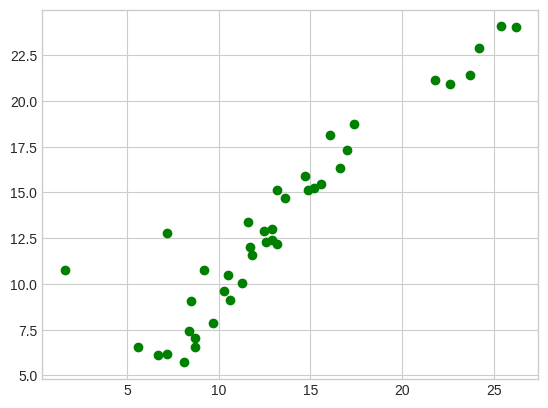

In [70]:
plt.scatter(y_test,y_prediction,c='g')

In [68]:
fc=pd.DataFrame(data={'Forecasted Sales': y_prediction.flatten()})
fc

,Forecasted Sales
0,10.057396
1,7.452281
2,7.019708
3,24.080297
4,12.017863
5,6.537939
6,12.782869
7,15.109746
8,10.769740
9,16.343580


<ipython-input-72-01ba66f9c8fa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fc['Forecasted Sales'])


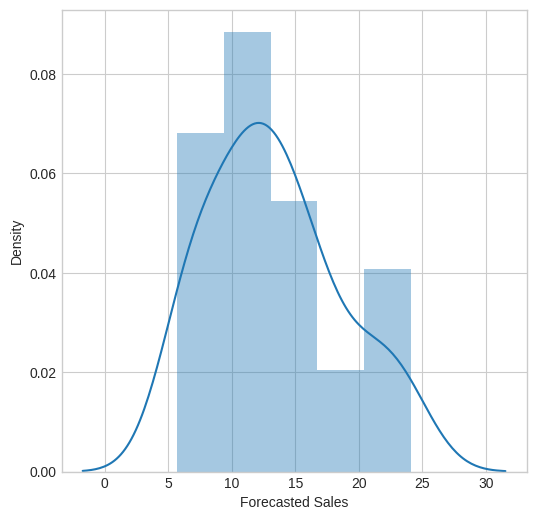

In [72]:
plt.figure(figsize=(6,6))
sns.distplot(fc['Forecasted Sales'])
plt.show()